In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston=pd.read_csv("boston.csv") 
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df=boston

In [4]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]  # Common names for Boston Housing Dataset columns


In [6]:
if len(df.columns) == len(feature_names):
    df.columns = feature_names

In [7]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [8]:
x = df.drop(columns=["MEDV"])  # Features: all columns except 'MEDV'
y = df["MEDV"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [11]:
##Standarding the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
x_train=scaler.fit_transform(x_train)

In [13]:
x_test=scaler.transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
mse=cross_val_score(regression,x_train,y_train, scoring='neg_mean_squared_error',cv=5)

In [18]:
np.mean(mse)

-25.977777430926288

In [19]:
#prediction
reg_pred=regression.predict(x_test) 

In [20]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

<Axes: xlabel='MEDV', ylabel='Density'>

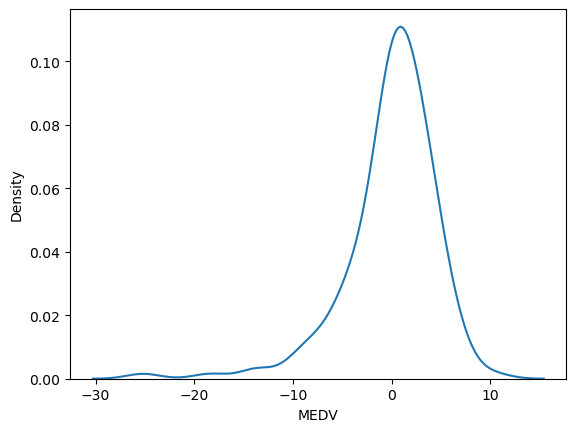

In [21]:
import seaborn as sns

sns.kdeplot(reg_pred - y_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
score=r2_score(reg_pred,y_test)

In [24]:
score

0.6693702691495591

### Ridge_regression

In [25]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

In [26]:
ridge_regressor = Ridge()

In [27]:
ridge_regressor

Ridge()

In [28]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridgecv.best_params_)

{'alpha': 10}


In [32]:
print(ridgecv.best_score_)

-25.807228822291478


In [35]:
ridge_pred=ridgecv.predict(x_test)

<Axes: xlabel='MEDV', ylabel='Density'>

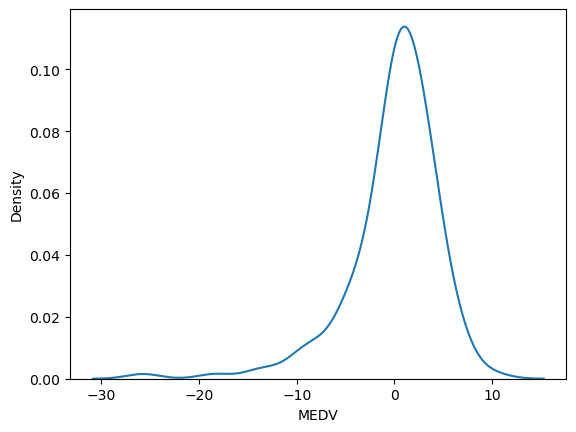

In [38]:
import seaborn as sns

sns.kdeplot(ridge_pred - y_test)

In [39]:
score=r2_score(ridge_pred,y_test)

In [40]:
score

0.6468557055633655

### Lasso Regression

In [41]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV

In [42]:
lasso=Lasso()

In [43]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [44]:
print(lassocv.best_params_)

{'alpha': 1}


In [45]:
print(lassocv.best_score_)

-31.153603752119004


In [46]:
lasso_pred=lassocv.predict(x_test)

<Axes: xlabel='MEDV', ylabel='Density'>

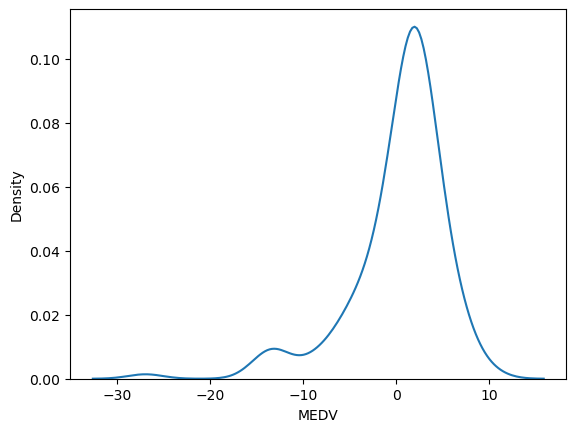

In [47]:
import seaborn as sns

sns.kdeplot(lasso_pred - y_test)